In [20]:
import fff
from fff.util import *

disk = fff.DiskImage('/Users/xin/practice1.dd.zip')

disk.volume

  #  Slot      Start  End       Length  Description
---  ------  -------  ------  --------  ----------------------------------
  1  0             0  0              1  Master Boot Record
  2  0:-           1  31            30  Unallocated
  3  0:0          32  30719      30688  Linux native partition (0x83)
  4  0:1       30720  98303      67584  Linux swap (0x82)
  5  0:2       98304  208895    110592  Linux native partition (0x83)
  6  0:-      208896  212991      4095  Unallocated
  7  0:3      212992  417791    204800  DOS 3.3+ Extended Partition (0x5)
  8  1        212992  212992         1  Extended Boot Record
  9  1:-      212993  213023        30  Unallocated
 10  1:0      213024  286719     73696  Linux native partition (0x83)
 11  1:1      286720  417791    131072  DOS 3.3+ Extended Partition (0x5)
 12  2        286720  286720         1  Extended Boot Record
 13  2:-      286721  286751        30  Unallocated
 14  2:0      286752  417791    131040  Linux native partition (0x83

In [2]:
print(disk.volume[4])

  #  Slot      Start    End    Length  Description        CHS
---  ------  -------  -----  --------  -----------------  ---------------------
  4  0:1       30720  98303     67584  Linux swap (0x82)  CHS 15/0/1 - 47/63/32


In [3]:
fat = disk.volume[10].filesystem
print(fat.boot_sector)

------------------------  ----------------
JMP                       eb3c90
OEM                       6d6b646f73667300
Bytes per Sector          512
Sectors per Cluster       4
Reserved Sectors          8
#FAT                      2
Max Files in Root         224
#Sectors                  4829741056
Media Type
FAT Size                  72
Sectors per Track         32
#Heads                    64
Sectors Before Partition  0
------------------------  ----------------


In [4]:
print(disk.volume[3])
hd(disk.volume[14].sectors[0][0:0x20])

  #  Slot      Start    End    Length  Description                    CHS
---  ------  -------  -----  --------  -----------------------------  --------------------
  3  0:0          32  30719     30688  Linux native partition (0x83)  CHS 0/1/1 - 14/63/32
00000000: EB 52 90 4E 54 46 53 20  20 20 20 00 02 02 00 00  .R.NTFS    .....
00000010: 00 00 00 00 00 F8 00 00  20 00 40 00 20 60 04 00  ........ .@. `..


In [5]:
ntfs = disk.volume[14].filesystem
ntfs.boot_sector

Field                            Value
-------------------------------  --------------------------
JMP                              eb5290
Signature                        NTFS    (4e54465320202020)
Bytes Per Sector                 512
Sectors Per Cluster              2
...                              ...
Media Descriptor                 248
Sectors Per Track                32
Number of Heads                  64
Hidden Sectors                   286752
...                              ...
Total Sectors                    131039
$MFT Cluster Number              16
$MFTMirr Cluster Number          32759
Cluster Per File Record Segment  1
...                              ...
Cluster Per Index Buffer         4
...                              ...
Volume Serial Number             7829755030752268642
...                              ...
Bootstrap Code                   fa33c08ed0bc007cfb68
Marker                           55aa

In [6]:
print(ntfs.mft.mft_entry)
[print(a) for a in ntfs.mft.mft_entry.attrs()]

---------------------------  --------------
inode                        0
Signature                    FILE(46494c45)
Offset to Fixup              48
Entry Count in Fixup Array   3
$LogFile Sequence Number     0
Sequence Number              1
Link Count                   1
Attribute Offset             56
Flags                        In use (0x1)
Used Size of MFT Entry       408
Allocated Size of MFT Entry  1024
Base Record                  0
Next Attribute ID            4
#attributes                  4
---------------------------  --------------
----------------------  -------------------------
Type ID                 16 ($StandardInformation)
Name
Size                    96
Non-Resident Flag       False (Resident)
Name Length             0
Name Offset             24
Flags                   0b0
Attribute ID            0
Attribute Offset        24
Attribute Length        72
Created                 1970-01-01 00:00:00
Modified                1970-01-01 00:00:00
MFT Modified            1

[None, None, None, None]

In [7]:
print(ntfs.mft.attr(type_id='$DATA'))

---------------------  -------------------
Type ID                128 ($DATA)
Name
Size                   72
Non-Resident Flag      True (Non-Resident)
Name Length            0
Name Offset            64
Flags                  0b0
Starting VCN           0
Last VCN               250
DataRuns Offset        64
Compression Unit Size  0
Allocated Size         257024
Actual Size            257024
Compressed Size        257024
#Data Runs             251
Resident Data          None
---------------------  -------------------


In [8]:
print(ntfs.mft.attr(type_id='$DATA').vcn)
hd(next(ntfs.mft.read(count=ntfs.mft.size)))

<VCN: 251 data runs>
00000000: 46 49 4C 45 30 00 03 00  00 00 00 00 00 00 00 00  FILE0...........
00000010: 01 00 01 00 38 00 01 00  98 01 00 00 00 04 00 00  ....8...........
00000020: 00 00 00 00 00 00 00 00  04 00 00 00 00 00 00 00  ................
00000030: B8 00 00 00 00 00 00 00  10 00 00 00 60 00 00 00  ............`...
00000040: 00 00 18 00 00 00 00 00  48 00 00 00 18 00 00 00  ........H.......
00000050: 00 80 3E D5 DE B1 9D 01  00 80 3E D5 DE B1 9D 01  ..>.......>.....
00000060: 00 80 3E D5 DE B1 9D 01  00 80 3E D5 DE B1 9D 01  ..>.......>.....
00000070: 06 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
00000080: 00 00 00 00 00 01 00 00  00 00 00 00 00 00 00 00  ................
00000090: 00 00 00 00 00 00 00 00  30 00 00 00 68 00 00 00  ........0...h...
000000A0: 00 00 18 00 00 00 02 00  4A 00 00 00 18 00 01 00  ........J.......
000000B0: 05 00 00 00 00 00 05 00  00 87 05 6B 62 94 C9 01  ...........kb...
000000C0: 00 87 05 6B 62 94 C9 01  00 87 05 6B 62 94 C9

00007840: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
00007850: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
00007860: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
00007870: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
00007880: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
00007890: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
000078A0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
000078B0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
000078C0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
000078D0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
000078E0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
000078F0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
00007900: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................

0000D600: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0000D610: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0000D620: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0000D630: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0000D640: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0000D650: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0000D660: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0000D670: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0000D680: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0000D690: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0000D6A0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0000D6B0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0000D6C0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................

000133B0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
000133C0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
000133D0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
000133E0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
000133F0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 03 00  ................
00013400: 46 49 4C 45 30 00 03 00  00 00 00 00 00 00 00 00  FILE0...........
00013410: 01 00 00 00 38 00 01 00  A8 00 00 00 00 04 00 00  ....8...........
00013420: 44 00 00 00 00 00 01 00  01 00 00 00 4D 00 00 00  D...........M...
00013430: 03 00 00 00 00 00 00 00  30 00 00 00 68 00 00 00  ........0...h...
00013440: 00 00 18 00 00 00 00 00  4C 00 00 00 18 00 01 00  ........L.......
00013450: 05 00 00 00 00 00 05 00  80 14 DD C9 B8 95 C9 01  ................
00013460: 80 14 DD C9 B8 95 C9 01  80 14 DD C9 B8 95 C9 01  ................
00013470: 80 14 DD C9 B8 95 C9 01  00 00 00 00 00 00 00 00  ................

00017230: 6E 5F 55 53 5D 3D 41 75  74 6F 70 73 79 20 46 6F  n_US]=Autopsy Fo
00017240: 72 65 6E 73 69 63 20 42  72 6F 77 73 65 72 0A 45  rensic Browser.E
00017250: 78 65 63 3D 2F 68 6F 6D  65 2F 65 78 61 6D 69 6E  xec=/home/examin
00017260: 65 72 2F 62 69 6E 2F 53  74 61 72 74 41 75 74 6F  er/bin/StartAuto
00017270: 70 73 79 0A 49 63 6F 6E  3D 2F 68 6F 6D 65 2F 65  psy.Icon=/home/e
00017280: 78 61 6D 69 6E 65 72 2F  50 69 63 74 75 72 65 73  xaminer/Pictures
00017290: 2F 61 67 65 6E 74 2E 70  6E 67 0A 47 65 6E 65 72  /agent.png.Gener
000172A0: 69 63 4E 61 6D 65 5B 65  6E 5F 55 53 5D 3D 0A 00  icName[en_US]=..
000172B0: FF FF FF FF 00 00 00 00  00 00 00 00 00 00 00 00  ................
000172C0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
000172D0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
000172E0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
000172F0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................

00019160: 20 02 00 00 01 02 00 00  00 00 00 05 20 00 00 00   ........... ...
00019170: 20 02 00 00 02 00 1C 00  01 00 00 00 00 03 14 00   ...............
00019180: FF 01 1F 00 01 01 00 00  00 00 00 01 00 00 00 00  ................
00019190: 80 00 00 00 48 00 00 00  01 00 40 00 00 00 02 00  ....H.....@.....
000191A0: 00 00 00 00 00 00 00 00  FE 17 00 00 00 00 00 00  ................
000191B0: 40 00 00 00 00 00 00 00  00 FC 5F 00 00 00 00 00  @........._.....
000191C0: 16 F9 5F 00 00 00 00 00  16 F9 5F 00 00 00 00 00  .._......._.....
000191D0: 32 FF 17 F8 C7 00 00 00  FF FF FF FF 00 00 00 00  2...............
000191E0: 00 FF FF FF 00 00 00 00  FF FF FF FF 00 00 00 00  ................
000191F0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 04 0C  ................
00019200: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
00019210: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
00019220: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................

0001B090: 86 00 00 00 18 00 01 00  F0 00 00 00 00 00 01 00  ................
0001B0A0: 80 E2 6D FB 81 96 C9 01  80 D0 87 CF 7E 72 C9 01  ..m.........~r..
0001B0B0: 80 E2 6D FB 81 96 C9 01  80 E2 6D FB 81 96 C9 01  ..m.......m.....
0001B0C0: 18 01 00 00 00 00 00 00  16 01 00 00 00 00 00 00  ................
0001B0D0: 00 00 00 00 00 00 00 00  22 00 53 00 63 00 61 00  ........".S.c.a.
0001B0E0: 6C 00 70 00 65 00 6C 00  20 00 44 00 61 00 74 00  l.p.e.l. .D.a.t.
0001B0F0: 61 00 20 00 43 00 61 00  72 00 76 00 69 00 6E 00  a. .C.a.r.v.i.n.
0001B100: 67 00 20 00 47 00 75 00  69 00 64 00 65 00 2E 00  g. .G.u.i.d.e...
0001B110: 64 00 65 00 73 00 6B 00  74 00 6F 00 70 00 63 6F  d.e.s.k.t.o.p.co
0001B120: 50 00 00 00 68 00 00 00  00 00 18 00 00 00 01 00  P...h...........
0001B130: 50 00 00 00 18 00 00 00  01 00 04 80 14 00 00 00  P...............
0001B140: 24 00 00 00 00 00 00 00  34 00 00 00 01 02 00 00  $.......4.......
0001B150: 00 00 00 05 20 00 00 00  20 02 00 00 01 02 00 00  .... ... .......

0001CFD0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0001CFE0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0001CFF0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 07 00  ................
0001D000: 46 49 4C 45 30 00 03 00  00 00 00 00 00 00 00 00  FILE0...........
0001D010: 01 00 01 00 38 00 01 00  E0 02 00 00 00 04 00 00  ....8...........
0001D020: 00 00 00 00 00 00 00 00  04 00 00 00 74 00 00 00  ............t...
0001D030: 07 00 6F 6C 00 00 00 00  10 00 00 00 48 00 00 00  ..ol........H...
0001D040: 00 00 18 00 00 00 00 00  30 00 00 00 18 00 00 00  ........0.......
0001D050: 80 E2 6D FB 81 96 C9 01  80 DE 68 FD 84 3B C9 01  ..m.......h..;..
0001D060: 80 E2 6D FB 81 96 C9 01  80 E2 6D FB 81 96 C9 01  ..m.......m.....
0001D070: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0001D080: 30 00 00 00 B0 00 00 00  00 00 18 00 00 00 03 00  0...............
0001D090: 92 00 00 00 18 00 01 00  4F 00 00 00 00 00 01 00  ........O.......

0001EF10: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0001EF20: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0001EF30: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0001EF40: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0001EF50: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0001EF60: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0001EF70: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0001EF80: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0001EF90: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0001EFA0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0001EFB0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0001EFC0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0001EFD0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................

00024CC0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
00024CD0: 00 00 00 00 00 00 00 00  0D 00 74 00 72 00 75 00  ..........t.r.u.
00024CE0: 65 00 63 00 72 00 79 00  70 00 74 00 2E 00 73 00  e.c.r.y.p.t...s.
00024CF0: 79 00 73 00 00 00 02 00  50 00 00 00 68 00 00 00  y.s.....P...h...
00024D00: 00 00 18 00 00 00 01 00  50 00 00 00 18 00 00 00  ........P.......
00024D10: 01 00 04 80 14 00 00 00  24 00 00 00 00 00 00 00  ........$.......
00024D20: 34 00 00 00 01 02 00 00  00 00 00 05 20 00 00 00  4........... ...
00024D30: 20 02 00 00 01 02 00 00  00 00 00 05 20 00 00 00   ........... ...
00024D40: 20 02 00 00 02 00 1C 00  01 00 00 00 00 03 14 00   ...............
00024D50: FF 01 1F 00 01 01 00 00  00 00 00 01 00 00 00 00  ................
00024D60: 80 00 00 00 48 00 00 00  01 00 40 00 00 00 02 00  ....H.....@.....
00024D70: 00 00 00 00 00 00 00 00  D2 00 00 00 00 00 00 00  ................
00024D80: 40 00 00 00 00 00 00 00  00 4C 03 00 00 00 00 00  @........L......

0002AA80: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0002AA90: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0002AAA0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0002AAB0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0002AAC0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0002AAD0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0002AAE0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0002AAF0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0002AB00: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0002AB10: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0002AB20: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0002AB30: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0002AB40: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................

00030830: 74 00 00 00 00 00 00 00  10 00 00 00 48 00 00 00  t...........H...
00030840: 00 00 18 00 00 00 00 00  30 00 00 00 18 00 00 00  ........0.......
00030850: 80 A5 F9 36 CB 95 C9 01  00 8C C8 2C 8E 58 C8 01  ...6.......,.X..
00030860: 80 A5 F9 36 CB 95 C9 01  80 71 FE 46 73 94 C9 01  ...6.....q.Fs...
00030870: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
00030880: 30 00 00 00 78 00 00 00  00 00 18 00 00 00 03 00  0...x...........
00030890: 5E 00 00 00 18 00 01 00  59 00 00 00 00 00 01 00  ^.......Y.......
000308A0: 80 A5 F9 36 CB 95 C9 01  80 A5 F9 36 CB 95 C9 01  ...6.......6....
000308B0: 80 A5 F9 36 CB 95 C9 01  80 A5 F9 36 CB 95 C9 01  ...6.......6....
000308C0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
000308D0: 00 00 00 00 00 00 00 00  0E 00 77 00 73 00 64 00  ..........w.s.d.
000308E0: 63 00 6F 00 64 00 65 00  67 00 65 00 6E 00 2E 00  c.o.d.e.g.e.n...
000308F0: 65 00 78 00 65 00 02 00  50 00 00 00 68 00 00 00  e.x.e...P...h...

000365F0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 24 00  ..............$.
00036600: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
00036610: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
00036620: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
00036630: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
00036640: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
00036650: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
00036660: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
00036670: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
00036680: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
00036690: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
000366A0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
000366B0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................

0003C3A0: 00 00 00 00 00 00 00 00  09 00 74 00 6F 00 6F 00  ..........t.o.o.
0003C3B0: 74 00 68 00 2E 00 67 00  69 00 66 00 00 00 00 00  t.h...g.i.f.....
0003C3C0: 00 00 00 00 00 00 00 00  10 00 00 00 02 00 00 00  ................
0003C3D0: FF FF FF FF 00 00 00 00  00 00 00 00 00 00 00 00  ................
0003C3E0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
0003C3F0: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 13 00  ................
0003C400: 46 49 4C 45 30 00 03 00  00 00 00 00 00 00 00 00  FILE0...........
0003C410: 04 00 00 00 38 00 00 00  08 01 00 00 00 04 00 00  ....8...........
0003C420: 00 00 00 00 00 00 00 00  05 00 00 00 F1 00 00 00  ................
0003C430: 0E 00 00 00 00 00 00 00  10 00 00 00 48 00 00 00  ............H...
0003C440: 00 00 18 00 00 00 00 00  30 00 00 00 18 00 00 00  ........0.......
0003C450: 80 96 5C 83 BE 9D C9 01  80 96 5C 83 BE 9D C9 01  ..\.......\.....
0003C460: 80 96 5C 83 BE 9D C9 01  80 96 5C 83 BE 9D C9 01  ..\.......\.....

In [9]:
print(ntfs.mft.find(inode=200).attr(type_id='$DATA'))

---------------------  -------------------
Type ID                128 ($DATA)
Name
Size                   80
Non-Resident Flag      True (Non-Resident)
Name Length            0
Name Offset            64
Flags                  0b0
Starting VCN           0
Last VCN               4546
DataRuns Offset        64
Compression Unit Size  0
Allocated Size         4656128
Actual Size            4655616
Compressed Size        4655616
#Data Runs             4547
Resident Data          None
---------------------  -------------------


In [10]:
print(ntfs.mft.find(inode=5).attr(type_id='$INDEX_ROOT'))
print(ntfs.mft.find(inode=5).attr(type_id='$INDEX_ALLOCATION')) # why inetpu8 not inetpub

------------------------  ---------------------------------------------
Type ID                   144 ($INDEX_ROOT)
Name                      $ I 3 0 
Size                      88
Non-Resident Flag         False (Resident)
Name Length               4
Name Offset               24
Flags                     0b0
Attribute ID              3
Attribute Offset          32
Attribute Length          56
Attribute Type            0x30
Collation Rule            0x1
Bytes per Index Record    4096
Cluster per Index Record  4

Index Node Header
Offset to First Entry     16
Size of Entries           40
Allocated Size            40
Flag                      1

---                       ---
inode                     0
Sequence Number           0 (0x0)
Entry Size                24
Content Size              0
Flags                     0x3 (Child node exists; Last entry in list; )
VCN of Child Node         0
------------------------  ---------------------------------------------
---------------------  -----

In [11]:
list(ntfs.root.list())

[r        4 "$AttrDef" 2560,
 r        8 "$BadClus" 0,
 r        6 "$Bitmap" 8192,
 r        7 "$Boot" 8192,
 d       11 "$Extend" 0,
 r        2 "$LogFile" 2097152,
 r        0 "$MFT" 257024,
 r        1 "$MFTMirr" 4096,
 d        9 "$Secure" 0,
 r       10 "$UpCase" 131072,
 r        3 "$Volume" 0,
 d        5 "." 0,
 d      238 ".Trash-0" 0,
 d       64 "DELL" 0,
 d       65 "inetpub" 0,
 d       66 "PerfLogs" 0,
 d       67 "Program Files" 0,
 d       68 "Users" 0,
 d       88 "Windows" 0]

In [12]:
ntfs.find(inode=68)

d       68 "Users" 0

.Trash-0/files/highlander.gif


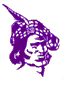

2fde83b3020a18c0378a18c141cc3ae4
.Trash-0/files/tooth.gif


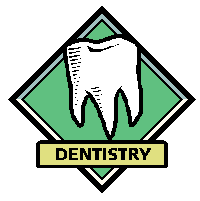

2837f45704fa1f05b0302ee599399edd
.Trash-0/info/highlander.gif.trashinfo
No previewer found for "application/x-empty"
d41d8cd98f00b204e9800998ecf8427e
.Trash-0/info/tooth.gif.trashinfo
No previewer found for "application/x-empty"
d41d8cd98f00b204e9800998ecf8427e
DELL/Dell_Badge.bmp


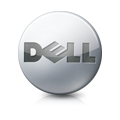

8d1f07421e47b1fccddaef69079a58a9
DELL/Dell_bar.png


94603fd857db38d4d6544a09c43198cf
DELL/Dell_logo.png


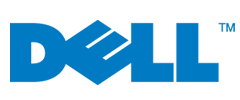

6f6748f55a9c8d7ed591eb23dfa84751
DELL/MCE_logo.png


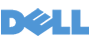

593ad51cebf3283e1952bff600366ec0
inetpub/wwwroot/armybackground.gif


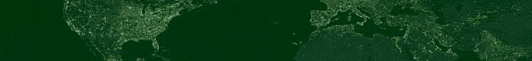

807ad32dea357d50301257ddfc1fd002
inetpub/wwwroot/armystar.gif


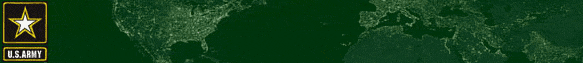

09efcb9ec3659609409b61a4e4877447
inetpub/wwwroot/paratrooper.gif


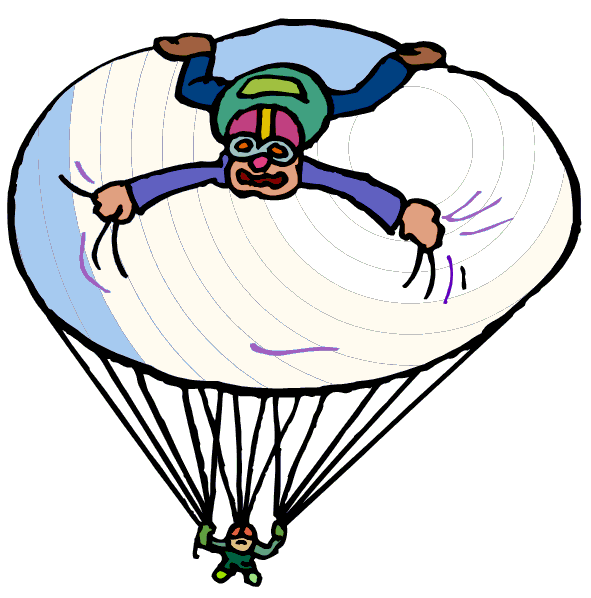

cb31c94dfa6eb01b1bbe503f960f1bde
inetpub/wwwroot/star.gif


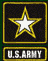

7f7a17c7575507de5c0a758613efa54e


In [23]:
for f in ntfs.root.list(recursive=True, regex='\\.jpe?g|\\.bmp|\\.png|\\.gif|\\.avi|\\.mpg|\\.mp4|\\.3gp'):
    print(f.fullpath)
    f.preview()
    print(md5sum(f.data))

r       10 "$UpCase" 131072 $UpCase


r      229 "highlander.gif" 1977 .Trash-0/files/highlander.gif


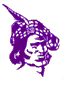

r      236 "tooth.gif" 3170 .Trash-0/files/tooth.gif


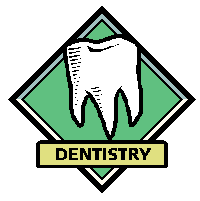

r      132 "Dell_Badge.bmp" 43256 DELL/Dell_Badge.bmp


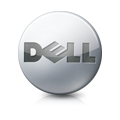

r      133 "Dell_bar.png" 3366 DELL/Dell_bar.png


r      134 "Dell_logo.png" 5411 DELL/Dell_logo.png


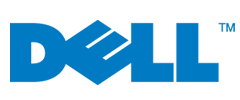

r      135 "MCE_logo.png" 1350 DELL/MCE_logo.png


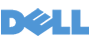

r      215 "armybackground.gif" 18949 inetpub/wwwroot/armybackground.gif


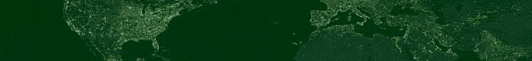

r      217 "armycorps" 61653 inetpub/wwwroot/armycorps


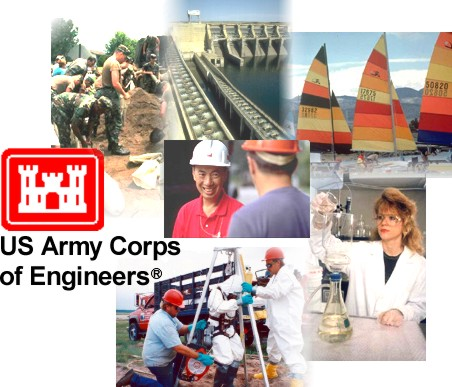

r      224 "ArmySealLow.jpe" 47532 inetpub/wwwroot/ArmySealLow.jpe


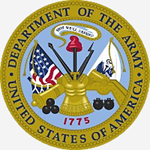

r      225 "armystar.gif" 21191 inetpub/wwwroot/armystar.gif


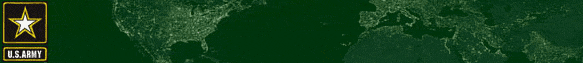

r      226 "bush_augustuscaesar.jpe" 23686 inetpub/wwwroot/bush_augustuscaesar.jpe


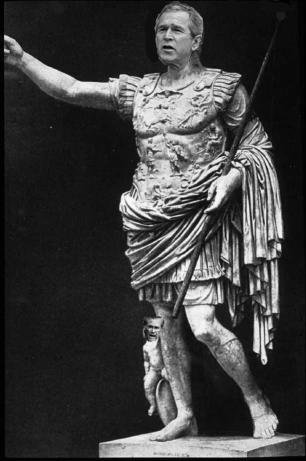

r      227 "CowMooFlageh.jpe" 23741 inetpub/wwwroot/CowMooFlageh.jpe


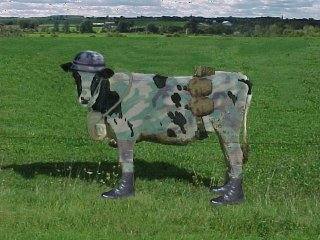

r      230 "kfc.jpe" 22616 inetpub/wwwroot/kfc.jpe


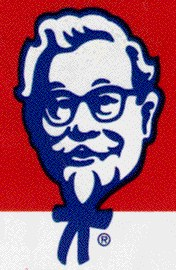

r      231 "monuments" 40045 inetpub/wwwroot/monuments


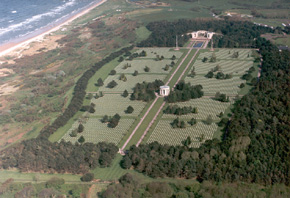

r      232 "paratrooper.gif" 25967 inetpub/wwwroot/paratrooper.gif


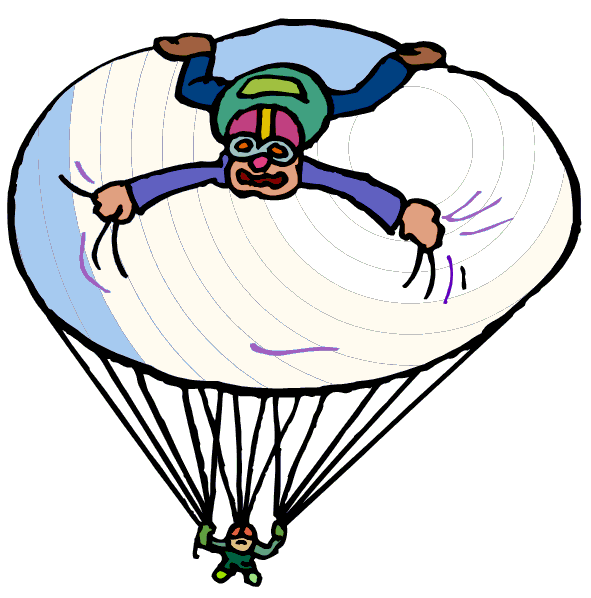

r      233 "Peale.jpe" 8775 inetpub/wwwroot/Peale.jpe


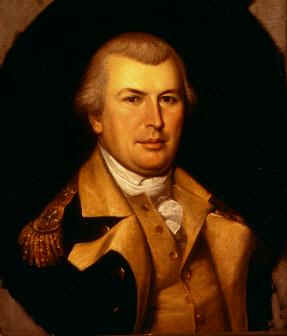

r      234 "rebuild" 4619 inetpub/wwwroot/rebuild


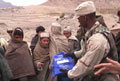

r      235 "star.gif" 2264 inetpub/wwwroot/star.gif


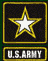

In [18]:
for f in ntfs.root.list(recursive=True):
    if f.mime.startswith('video') or f.mime.startswith('image'):
        print(f, f.fullpath)
        f.preview()